# **Project K Means Clustering**

**Overview**:

**Data used**: Adult dataset (adult-2.csv)

**Process**:
* Standardized the data after one-hot encoding categorical variables.
* Applied PCA to reduce dimensions to 2 components.
* Performed K-Means clustering for K values ranging from 2 to 10.
* Calculated inertia and silhouette scores for each K.
* Plotted inertia and silhouette scores to evaluate the optimal number of clusters.

**Data Loading and Data Cleaning Process**

In [5]:
import pandas as pd
from tqdm.auto import tqdm

# Load the data
adult_data = pd.read_csv('adult-2.csv')

# Define the clean_data function
def clean_data(df):
    # Replace '?' with the mode in workclass, occupation, and native-country columns
    df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
    df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)
    df['native-country'].replace('?', df['native-country'].mode()[0], inplace=True)
    # Convert income column to 0/1
    df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    # Map education categories to broader categories
    edu_mapping = {
        '1st-4th': 'HS',
        '5th-6th': 'HS',
        '7th-8th': 'HS',
        '9th': 'HS',
        '10th': 'HS',
        '11th': 'HS',
        '12th': 'HS',
        'HS-grad': 'HS',
        'Some-college': 'College',
        'Assoc-voc': 'College',
        'Assoc-acdm': 'College',
        'Bachelors': 'University',
        'Masters': 'University',
        'Prof-school': 'University',
        'Doctorate': 'University',
        'Preschool': 'Pre-HS'
    }
    df['education'] = df['education'].map(edu_mapping)
    return df

# Clean the data
adult_data_cleaned = clean_data(adult_data)

# Show the head of the cleaned dataframe
print(adult_data_cleaned.head())

# Show the unique values in the 'education' column after mapping
print(adult_data_cleaned['education'].unique())

   age  workclass  fnlwgt education  educational-num      marital-status  \
0   25    Private  226802        HS                7       Never-married   
1   38    Private   89814        HS                9  Married-civ-spouse   
2   28  Local-gov  336951   College               12  Married-civ-spouse   
3   44    Private  160323   College               10  Married-civ-spouse   
4   18    Private  103497   College               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  

**Model Build and plotting decision boundary and clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


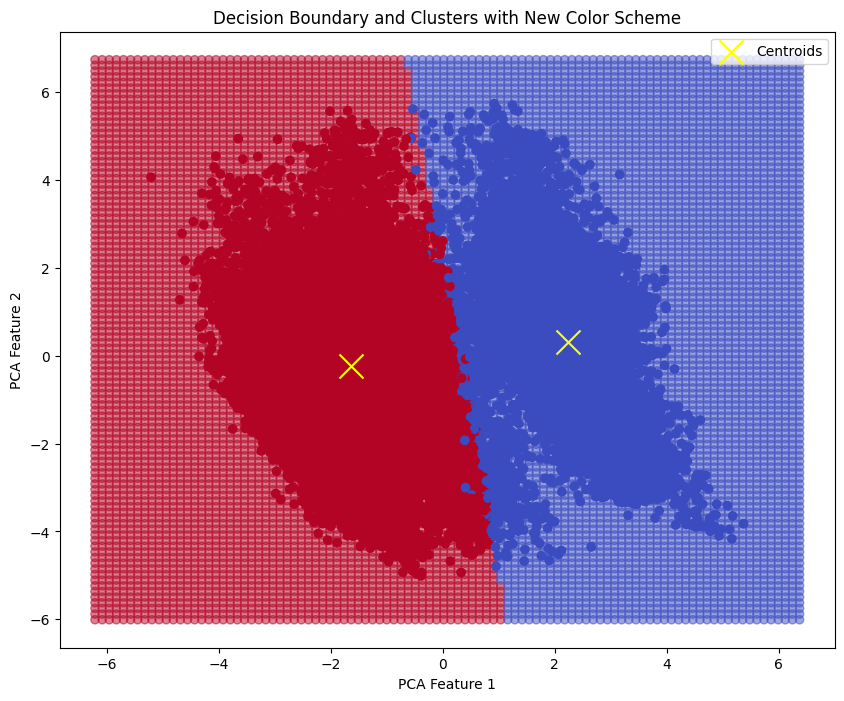

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Initialize OneHotEncoder and StandardScaler
ohe = OneHotEncoder()
scaler = StandardScaler()
pca = PCA(n_components=4)
kmeans = KMeans(n_clusters=2)

# One-hot encode the categorical features
adult_data_encoded = pd.get_dummies(adult_data_cleaned.drop('income', axis=1))

# Add the 'income' column back to the encoded dataframe
adult_data_encoded['income'] = adult_data_cleaned['income']

# Scale the features
features_scaled = scaler.fit_transform(adult_data_encoded.drop('income', axis=1))

# Perform PCA to reduce to 4 components
features_pca = pca.fit_transform(features_scaled)

# Fit K Means model
kmeans.fit(features_pca)

# Create a meshgrid for the first two principal components
resolution = 100
grid_x = np.linspace(features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1, resolution)
grid_y = np.linspace(features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1, resolution)
grid = np.meshgrid(grid_x, grid_y)

# Flatten the grid to create a list of points
flat_grid = np.array(grid).reshape(2, -1).T

# We need to extend this grid to 4 dimensions
# Since we don't have information for the other two dimensions, we'll use zeros
flat_grid_extended = np.hstack((flat_grid, np.zeros((flat_grid.shape[0], 2))))

# Predict labels for each point in the extended meshgrid
labels = kmeans.predict(flat_grid_extended)

# Plotting with a for the decision boundary and clusters
plt.figure(figsize=(10, 8))
plt.scatter(flat_grid[:, 0], flat_grid[:, 1], c=labels, alpha=0.5, cmap='coolwarm')
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_, cmap='coolwarm', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='x')
plt.title('Decision Boundary and Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

**Calculating Inertia and Silhouette score**

In [7]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(features_pca, kmeans.labels_)

# Print the scores
print("Inertia score: ", inertia)
print("Silhouette score: ", silhouette)

Inertia score:  429735.9721659057
Silhouette score:  0.3185189993177995


**K Mean Clustering with 4 clusters and PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


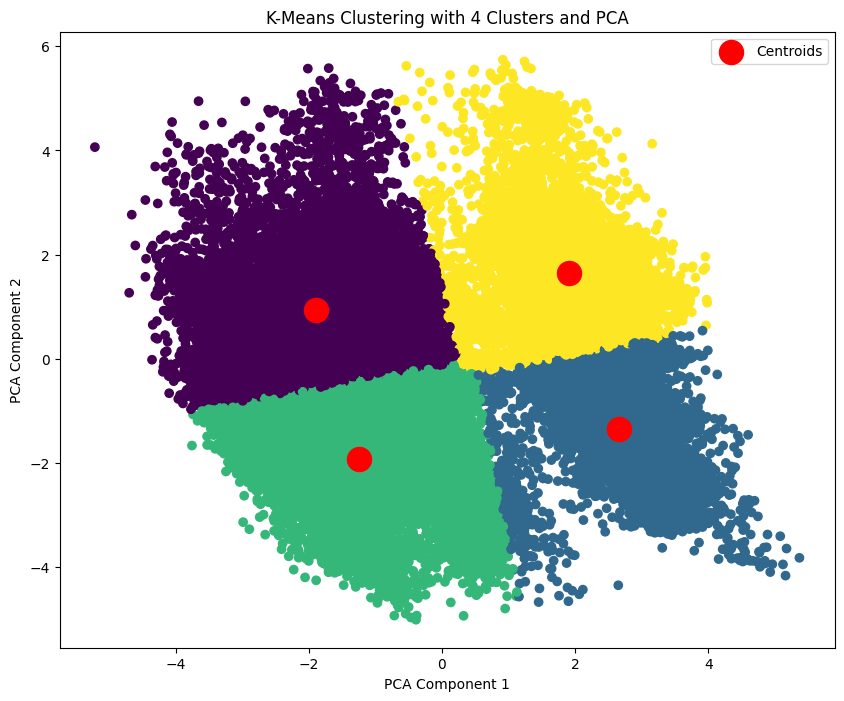

Inertia with 4 Clusters: 85038.26928523283
Silhouette Score with 4 Clusters: 0.4415789644530189


In [9]:

# Drop the target variable 'income'
X = adult_data_cleaned.drop('income', axis=1)

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA with 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# Perform K-Means clustering using the first two PCA components
kmeans_2 = KMeans(n_clusters=4, random_state=42)
kmeans_2.fit(X_pca[:, :2])

# Plot the clusters and decision boundaries
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_2.labels_, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with 4 Clusters and PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Calculate Inertia and Silhouette Score
inertia_4 = kmeans_2.inertia_
silhouette_4 = silhouette_score(X_pca[:, :2], kmeans_2.labels_)

# Print Inertia and Silhouette Score
print('Inertia with 4 Clusters:', inertia_4)
print('Silhouette Score with 4 Clusters:', silhouette_4)

**Plotting scores with different K value**

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

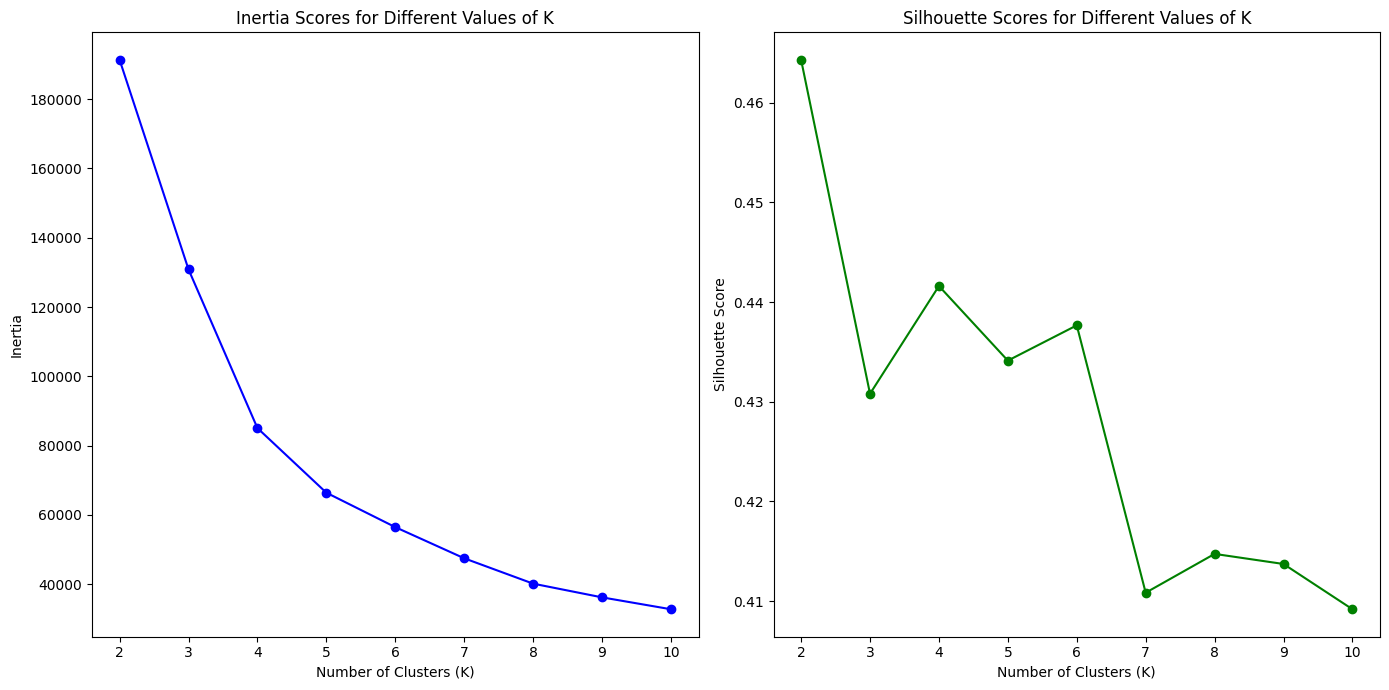

In [10]:
from sklearn.metrics import silhouette_score
import numpy as np

# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Test different values of K and calculate inertia and silhouette score for each
K_values = range(2, 11)
inertia_scores = []
silhouette_scores = []

for K in tqdm(K_values):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_pca_2)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca_2, kmeans.labels_))

# Plot the results
plt.figure(figsize=(14, 7))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(K_values, inertia_scores, marker='o', color='blue')
plt.title('Inertia Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# **Conclusion:**

* The inertia score decreases as K increases, which is expected as more clusters will fit the data more closely.
* The silhouette score peaks at certain values of K, suggesting an optimal clustering solution at those points.
* The plots provide a visual guide to selecting the best K for clustering, balancing between cluster tightness (inertia) and separation (silhouette score).